In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import edhec_risk_kit as erk
import yfinance as yf
import seaborn as sns
from datetime import date
from pandas_datareader import data
import work as work
import investpy

import plotly.express as px
import plotly.graph_objects as go
import plotly

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.core.display import display, HTML


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#data = work.updated_world_indices(category = 'All', timeframe='Weekly')
#hmap = data[0]
#rawdata = data[1]
#rawdata.to_excel('rawdata.xlsx', sheet_name='Equities')

# Weekly Global Market Report


<div style="font-size: 15px">
<br>
    <b> Date: </b>  21<sup>st</sup> November, 2020
</div>

<a id ="content"></a>
## Contents:

1. [World Equities](#eq)
2. [Fixed Income](#fi)
3. [Currencies (FX)](#cur)
4. [Commodities](#comd)
5. [Charts of the Week](#charts)
6. [Key Economic Events - Next Week](#eco)

# World Equity Markets Heatmap

In [11]:
rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
def world_map(timeperiod):
    """
    """
    iso = pd.read_excel('World_Indices_List.xlsx', sheet_name='iso')
    iso.set_index('Country', inplace=True)
    rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
    rawdata = rawdata.drop(['China A50', 'SmallCap 2000', 'BSE Sensex', 'Euro Stoxx 50', 'Nasdaq 100', 'KOSDAQ', 'RTSI', 'DJ Shanghai', 'SZSE Component'], axis=0)
    data2 = rawdata.merge(iso['iso_alpha'], on='Country')
    data2[['Chg (%)', 'Chg YTD (%)', '$ Chg (%)','$ Chg YTD (%)']] = data2[['Chg (%)', 'Chg YTD (%)', '$ Chg (%)','$ Chg YTD (%)']].round(4)*100

    df = data2
    for col in df.columns:
        df[col] = df[col].astype(str)

    df['text'] = 'Return: '+df[timeperiod]+'%' + '<br>' \
                  'Country: '+ df['Country'] + '<br>' \

    fig1 = go.Figure(data=go.Choropleth(locations=df['iso_alpha'], z=df[timeperiod].astype(float).round(2), colorscale='RdYlGn', autocolorscale=False,
        text=df['text'], colorbar_ticksuffix = '%', colorbar_title = "Return", zmax=6, zmin=-3))



    return fig1.update_layout(width=950, height=500, margin=dict(l=0,r=0,b=0,t=0,pad=1),
                        xaxis=dict(scaleanchor='x', constrain='domain'), coloraxis_colorbar_x=1)

style = {'description_width': 'initial'}
interact(world_map,
             timeperiod = widgets.Dropdown(options=(('Weekly LCL Returns', 'Chg (%)'), ('YTD LCL Returns', 'Chg YTD (%)'),
                                                ('Weekly USD Returns', '$ Chg (%)'), ('YTD USD Returns', '$ Chg YTD (%)')),
                                                value = '$ Chg (%)', style=style, description='Return Category: '));

interactive(children=(Dropdown(description='Return Category: ', index=2, options=(('Weekly LCL Returns', 'Chg …

<a id ="eq"></a>
## World Equities

### Local Currency & USD Performance (Weekly & YTD)
*Data is sorted by Weekly USD Performance (%)

In [4]:
rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
def hmap(sortby):
    hmap = rawdata.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}",'Chg': "{:.2f}", 'Chg (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}", '$ Chg (%)': "{:.2%}", '$ Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)', 'Chg', 'Country'], axis=1).columns))
    return hmap
    
style = {'description_width': 'initial'}
interact(hmap,
             sortby = widgets.Dropdown(options=(('Weekly LCL Returns', 'Chg (%)'), ('YTD LCL Returns', 'Chg YTD (%)'),
                                                ('Weekly USD Returns', '$ Chg (%)'), ('YTD USD Returns', '$ Chg YTD (%)')),
                                                value = '$ Chg (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', index=2, options=(('Weekly LCL Returns', 'Chg (%)'), (…

**HIGHLIGHTS**:

- **Wall Street** closed in the red on Friday, as rising new coronavirus cases and policy uncertainty dented sentiment. On Friday, the [Treasury Department and the Federal Reserve disagreed over the continuation of funding for some of the emergency programs](https://abcnews.go.com/Business/mnuchin-seeks-end-federal-reserve-emergency-lending-programs/story?id=74315800) implemented during the recession, as Secretary Steven Mnuchin is seeking to end several Fed facilities. On the pandemic side, California Gov. Gavin Newsom issued a [“limited Stay at Home Order”](https://www.nbcbayarea.com/news/coronavirus/california-to-implement-limited-stay-at-home-order/2403576/) on a majority of the state’s residents, while the CDC advised Americans against traveling for Thanksgiving. On the positive side, Pfizer and BioNTech said they will [apply for an emergency approval of its Covid-19 vaccine from the Food and Drug Administration on Friday](https://edition.cnn.com/2020/11/20/health/pfizer-vaccine-eua-submission/index.html). The Dow Jones lost 0.8% to 29,263 and the S&P 500 shed 0.7% to 3558, while the Nasdaq fell 0.4% to 11,855. During the week, the Dow retreated 0.7% and the S&P 500 dropped 0.8%, whereas the Nasdaq 100 lost 0.2%.

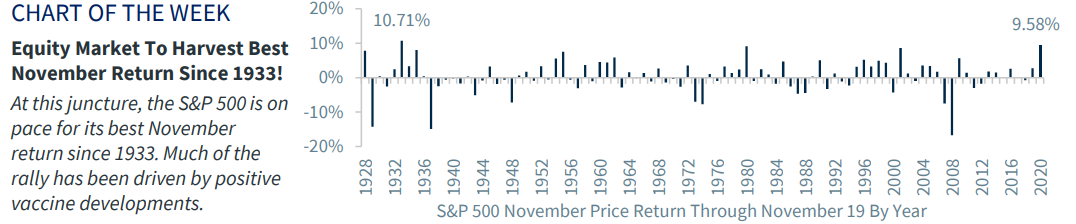

- There have been some indications of momentum slowing in the economic recovery lately. [US retail sales slowed in October](https://www.wsj.com/articles/us-economy-october-retail-sales-coronavirus-recovery-11605561529), growing by 0.3% m/m vs 1.6% prior. Also, [November Michigan Sentiment came in below expectations](https://in.reuters.com/article/usa-economy-sentiment-idUSL1N2HZ1M6) at 77.0 (vs 81.8), and [weekly jobless claims ticked slightly higher](https://www.nbcnews.com/business/business-news/latest-initial-weekly-jobless-claims-total-742-000-n1248224). While a normalization of growth rates is to be expected (for example retail sales are still up 8.5% y/y), the ongoing virus surge and accompanied localized shutdowns do increase the likelihood of more choppy economic data in the months ahead, particularly in the absence of additional fiscal aid.

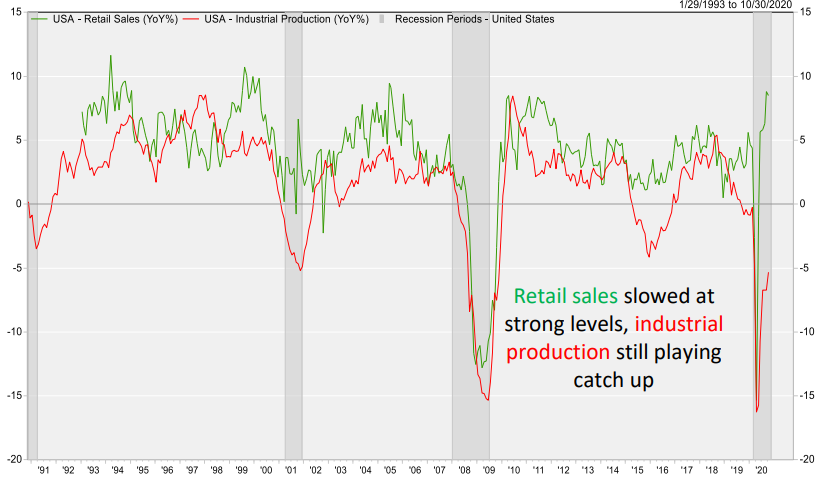

- That said, some areas such as housing remain a bright spot with continued momentum- the [NAHB housing market index continued its advance in November](https://www.advisorperspectives.com/dshort/updates/2020/11/17/nahb-housing-market-index-sales-growth-lifts-builder-confidence-to-new-record-high?topic=covid-19-coronavirus-coverage) at the highest levels on record. There is also the potential for current localized shutdowns to spur urgency in Congress passing some fiscal support, maybe even as part of budget discussions with funding due by December 11th . Additionally, inflationary pressures remain low and the Fed (on hand to support the recovery as needed) may step in due to the D.C. stalemate.


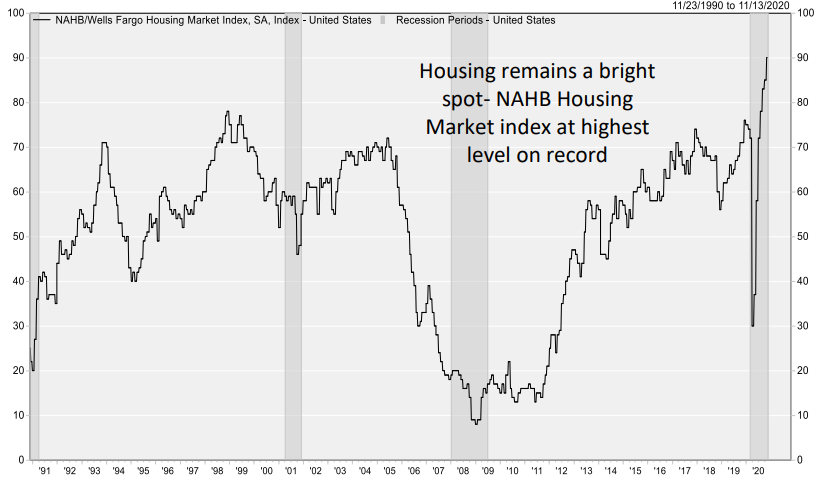

- The percentage of bullish sentiment spiked this week to 55.84%, bringing the bull/bear ratio to 2.25x, which is the highest reading since January 2018. This has not been a good indicator to signal a major change of market direction, but it is often a precursor (weeks/months) to a pullback or consolidation. While markets are increasingly constructive over the next 12 month outlook in light of vaccine progress, one should not be surprised for the road to be bumpy in the coming weeks and months.

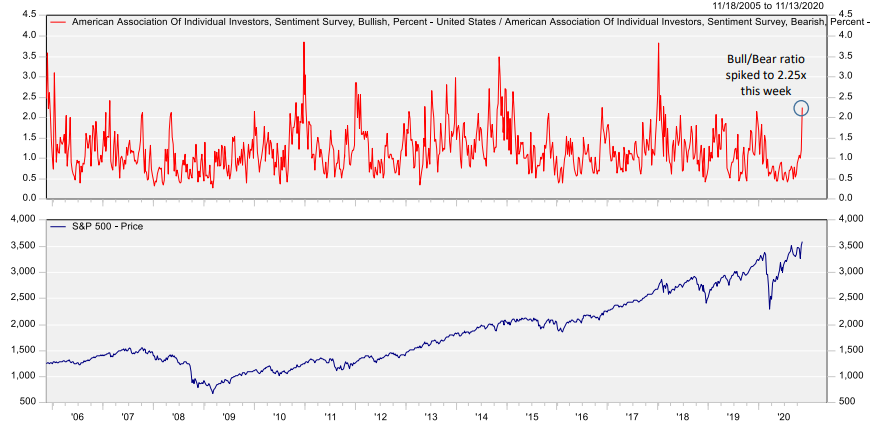

- **European equities** closed higher on Friday, with Frankfurt’s DAX 30 rising 0.4% to end at 13,137 and other major bourses gaining between 0.3% and 0.8%, and booking its third weekly gain boosted by prospects of an effective COVID-19 vaccine. In the last few days Pfizer/BioNTech, Moderna and Oxford, and AstraZeneca all reported positive results from the trials. Meanwhile, European Union leaders made no progress toward resolving a [dispute to unlock a €1.8 trillion budget](https://www.politico.eu/article/eus-e1-8-trillion-game-of-chicken/) and pandemic recovery package; and talks between EU and UK over Brexit were suspended after one of the negotiators was tested positive for Covid. For the week, the DAX 30 added 0.5%.



- The IBEX 35 (**Spain**) ended 0.6% higher on Friday and gained 2.5%, its third straight weekly gain, in line with its European peers, as investors continued to monitor developments around Covid-19 infections and restrictions across Europe. The coronavirus situation in [Spain continues to slowly improve](https://www.aa.com.tr/en/europe/spain-sees-large-drop-in-hospitalized-covid-19-patients/2050890), even though case numbers, hospitalizations and deaths remain high. Spain reported 16,233 new cases on Thursday, slightly up from 15,300 on Wednesday, but down by more than 3,000 compared to last Thursday and around 5,000 less than the daily surge two weeks ago. Meantime, [European Commission President Ursula von der Leyen has said that the vaccines could be approved before the end of the year](https://www.euronews.com/2020/11/19/eu-could-green-light-two-covid-19-vaccines-in-december).


- The CAC 40 (**France**) advanced more than 2% in the third week of November, extending an 8% gain in the previous week, after the number of new coronavirus infections in France slowed for the third day to 21.1K on Thursday. On the corporate front, telecoms and cable group [Altice Europe](https://telecom.economictimes.indiatimes.com/news/altice-europe-beats-forecasts-boosted-by-customer-wins/79314258) beat quarterly core profit forecasts on Thursday, as it added French mobile and residential fibre customers, offsetting lower media revenues.


- The FTSE 100 (**UK**) rose 0.6%, its third straight weekly gain, after economic data showed [Britain's retail sales rose more than expected in October](https://in.reuters.com/article/health-coronavirus-britain-economy/uk-borrows-22-bln-pounds-in-oct-retail-sales-rise-again-idINS8N2HE00U) despite a resurgence in coronavirus cases; while public sector net borrowing came in below market expectations, but was still the sixth-highest borrowing in any month since monthly records began in 1993. At the same time, prospects of easing coronavirus restrictions lifted sentiment as UK Health Secretary said Britain may allow a Christmas period with less stringent restrictions as there were signs that [domestic infections were starting to flatten](https://in.reuters.com/article/us-health-coronavirus-britain-hancock/britain-may-allow-christmas-as-covid-cases-start-to-flatten-idINKBN2800Q1) as a result of the current lockdowns. Meanwhile, investors continued to monitor negotiations over a post-Brexit trade deal with the EU as [talks were suspended after one of the EU negotiators tested positive for COVID-19](https://www.newindianexpress.com/world/2020/nov/20/brexit-trade-negotiations-suspended-because-of-covid-19-case-2225803.html).


- The ASX 200 (**Australia**) fell 0.12% on Friday, snapping 4 session of gain and fading from 9-month highs, while closing 2.22% higher for the week and posting the third consecutive week of gains. Among individual stocks, shares of [Mesoblast added 11.31% after announcing a collaboration deal with Swedish drug maker Novartis](https://www.globenewswire.com/news-release/2020/11/19/2130604/0/en/Mesoblast-Enters-Global-Collaboration-for-Development-Manufacture-and-Commercialization-of-Remestemcel-L.html) to manufacture its lead drug candidate. Meantime, preliminary data showed that [retail sales in Australia rose by 1.6% month-over-month in October](https://www.fxstreet.com/news/australia-retail-sales-pre-for-october-16-mom-significantly-beating-estiamtes-aud-firmer-202011200041), easily beating market consensus of a 0.3% rise and posting the first increase since July.


- The Nikkei 225 (**Japan**) lost 0.42% on Friday, extending declines for the third consecutive session, and retreating further from 29-year highs hit on Tuesday while adding 0.45% for the week. Japan reported 2385 new infections on Thursday, extending record highs hit in the previous day as [Prime Minister Yoshihide Suga warned that the country is on "maximum alert"](https://www.japantimes.co.jp/news/2020/11/21/business/economy-business/japan-coronavirus-economic-double-dip/) and has called on people to do all they can to prevent infections. In local data, [consumer prices declined 0.4% in October year-on-year](https://www.aljazeera.com/economy/2020/11/20/japan-consumer-prices-fall-at-fastest-pace-in-a-decade-in-oct), posting the sharpest decline in more than 4 years. Meantime, preliminary data showed that the [au Jibun Bank Japan Composite PMI fell to 47.0 in November 2020](https://www.cnbc.com/2020/11/20/japans-factory-activity-decline-accelerates-in-november-as-pandemic-drags-on-.html) from a final 48.0 a month earlier, with the services PMI posting its 10th month of contraction and lowest reading in 3 months, while the manufacturing PMI also unexpectedly dropped.

**EMERGING MARKETS**

- **MEXICO’s IPC** jumped 2.7% during the week. Mexico reported 576 new Covid-19 deaths, making it the fourth country where the toll from the virus has surpassed 100,000. Mexico w[on approval from the International Monetary Fund to maintain its flexible credit line at USD 63.4 billion](http://www.xinhuanet.com/english/2020-11/21/c_139531605.htm) amid the global pandemic, bucking the reductions taken in recent years, according to three people familiar with the talks. Cement output in Mexico rose 11.4% in September, showing marked improvement as the construction sector continues to recover from lockdowns. Meanwhile, the country threatened to cut cooperation with the U.S. after the surprise arrest of its former defense minister in Los Angeles; a federal judge in Brooklyn agreed to the charges being dropped. The treasurer of Mexico’s Finance Ministry, an entrepreneur and a career Banxico director are the three women seen as the top candidates to fill a key seat on the board of the country’s central bank. Mexico’s Senate approved a bill to [decriminalize the use of marijuana](https://www.dailymail.co.uk/news/article-8968569/Vote-Mexico-brings-worlds-largest-legal-weed-market-one-step-closer.html) in a country beset by decades of corruption and violence tied to the illegal drug trade.


- **BRAZIL**’s Ibovespa lost 0.6% on Friday and gained 1.3% during the week. On the macro side, the BRL lost 1.5% in the session to trade near 5.40 per USD. Brazil’s central bank signaled it will step in to support the real through foreign-exchange swaps if there are strong outflows by the end of the year. Central bank officials reinforced views that inflation shocks are transitory and do not threaten plans to hold the interest rate at a record low. [Fitch Ratings affirmed Brazil’s sovereign rating at BB- and maintained a negative outlook](https://www.fitchratings.com/research/sovereigns/fitch-affirms-brazil-at-bb-outlook-negative-18-11-2020). President J[air Bolsonaro emerged weaker from Nov. 15 municipal elections](https://jacobinmag.com/2020/11/brazil-election-results-jair-bolsonaro) that were widely seen as a referendum on the first half of his four-year mandate The nation’s main exchange decided to allow trading on all assets on holidays in Sao Paulo. On the corporate side, airplane maker [Embraer announced that it has partnered with the Portuguese energy group EDP to develop a 100% electric propulsion aircraft](http://www.xinhuanet.com/english/2020-11/21/c_139531638.htm) with a first flight scheduled for next year.


- The **SOUTH AFRICA** FTSE/JSE Africa All Shares index was flat-to-lower around 56,700 on Friday, having touched a near two-week low of 56,546 earlier in the session, as investors cautiously wait for credit reviews by Moody's and S&P later in the day. Meanwhile, traders keep monitoring coronavirus cases and renewed restrictions worldwide. In South Africa, new 2514 cases were detected on Thursday, mostly in Western Cape, taking the total to 759,658. South African Health Minister Dr Zweli Mkhize said the government is extremely concerned about the sharp increase in cases of COVID-19 infections and deaths, and is contemplating imposing stricter measures during the festive season. For the week, the benchmark index is set to fall 0.6%, heading for the first weekly loss of November.


- The FTSE KLCI (**MALAYSIA**) rose more than 0.6% to close at 1,594 on Friday, as rising COVID-19 cases across the globe boosted demand for glove-linked stocks. [Top Glove, the world’s largest rubber glove manufacturer, jumped 5% and Hartalega, which is engaged in the manufacture and sale of latex gloves](https://www.theedgemarkets.com/article/fbm-klci-closes-1007-points-159375), climbed 2.1%. For the week, the index added 0.3% as promising news of a coronavirus vaccine and the signature of the world's largest free trade bloc by 15 Asia-Pacific countries offset concerns about new lockdowns across the globe.


**ECONOMIC DATA WATCH**

- Looking at economic data, US reported very solid homebuilding and sales data. Retail sales disappointed with slower growth but industrial production recorded sharper rebound. Meanwhile, initial jobless claims rose for the first time in five weeks, underscoring weaker job growth. Regional manufacturing indexes all came in lower, pointing to retreating momentum in the sector. Other than that, inflation is subdued generally; UK CPI beat expectation but was still below BOE’ s target. Eurozone and Japan continued to report negative inflation readings. [Retail sales in Canada rose 1.1%](https://www.bloombergquint.com/onweb/retail-sales-in-canada-beat-estimates-on-broad-increase) over a month earlier in September 2020, following an upwardly revised 0.5% gain in the previous month and beating market expectations of a 0.2% increase.


- The consumer confidence indicator in the Euro Area fell 2.1 points from the previous month to -17.6 in November 2020, the lowest since May and compared with market expectations of -17.7. China’s retail sales, industrial production as well as fixed investment data reflect steady economic recovery. Australia wage growth slowed substantially but the latest job report was upbeat. [Russia's GDP contracted 4.7%](https://in.reuters.com/article/russia-economy-gdp/russias-economy-plunges-47-y-y-in-oct-after-3-drop-in-sept-idINR4N2HC02G)from a year earlier in October of 2020, following a downwardly revised 3% drop in the previous month driven by a decline in manufacturing and agriculture sectors, the ministry said. The cumulative January to October GDP contraction at 3.6%.


**DATA RELEASES NEXT WEEK**


- In the week ahead, we start the week with the releases of preliminary Markit PMI readings for the US, Eurozone, UK and Japan alongside Singapore CPI and US Chicago Fed National Activity Index. 


- On Tuesday, key data are Hong Kong exports and a series of US house price indexes (FHFA House Price as well as S&P CoreLogic House Price Index), Conference Board Consumer Confidence and Richmond Fed Manufacturing PMI. 


- On Wednesday, Malaysia CPI is due at noon. The rest are all US data scheduled ahead of Thursday’s Thanksgiving holiday. They include initial jobless claims, international trade, second GDP reading, durable goods orders as well as the closely watched Personal Outlay Report (personal income, spending and core PCE inflation). 


- Data are miminal on Thursday. The Federal Reserve however will publish its latest meeting minutes. New Zealand trade report and Singapore industrial production are also on the deck. 


- Last but not least on Friday, New Zealand consumer confidence, China industrial profits as well as Eurozone Economic Sentiment are in the pipeline.

**STOCKS THAT DEFINED THE WEEK**


**WALMART INC. (WMT)**

-  Home-improvement projects and household basics are propping up big-box retailers as the coronavirus intensifies again. Walmart posted its third consecutive quarter of growth, driven by a 79% jump in e-commerce sales. Target Corp. said comparable sales rose 20.7% as the retailer gobbled up market share from pandemic-stricken rivals. And Home Depot Inc. is increasing pay for front-line workers after the pandemic brought another strong quarter. Walmart shares fell 2% Tuesday.


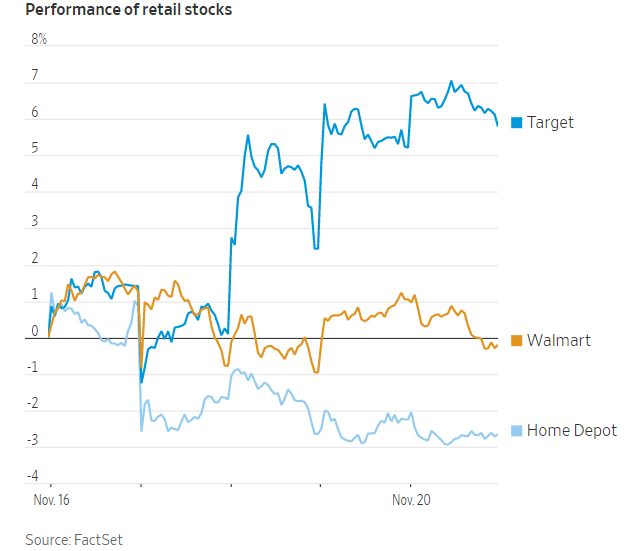

**MODERNA (MRNA)**

- Another drugmaker provided a boost to hopes that a coronavirus vaccine might be right around the corner. Moderna said Monday that its experimental shot was 94.5% effective at protecting people from Covid-19, according to an early analysis of study results. Regulators still need to review more complete data expected later this month. Moderna said it plans to seek authorization from federal health authorities by early December. A rival drugmaker, Pfizer Inc., released final data showing its vaccine to be 95% effective, the company said Wednesday. Pfizer is on track to begin distributing its shot by the end of the year if regulators give the green light. Moderna shares rose 9.6% Monday.

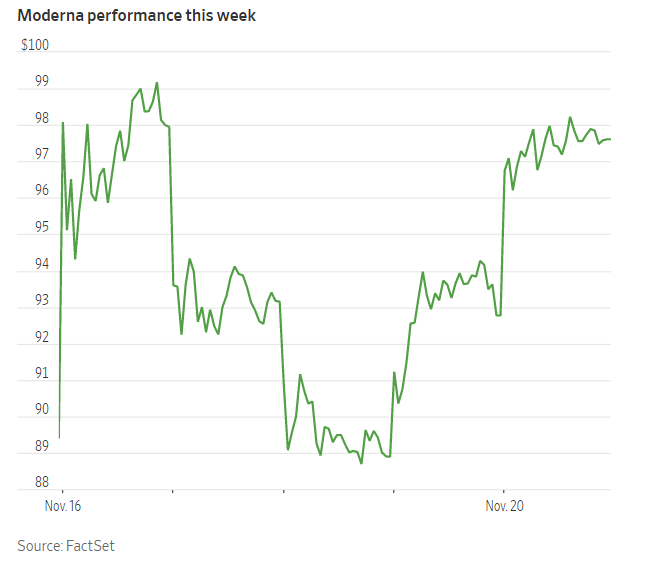

**BOEING (BA)**

- Boeing’s 737 MAX is once again cleared for takeoff. The Federal Aviation Administration said Wednesday it approved the jet for passenger flights again, helping to bring an end to one crisis as Boeing grapples with another wrought by the pandemic: fewer travelers. The MAX has been grounded since March 2019 after two crashes killed 346 people. U.S. regulators issued safety directives and notices to airlines globally that clear the way for Boeing to resume deliveries of the passenger jet, but a collapse in demand for air travel has prompted airlines to cancel orders. Boeing shares fell 3.2% Wednesday.

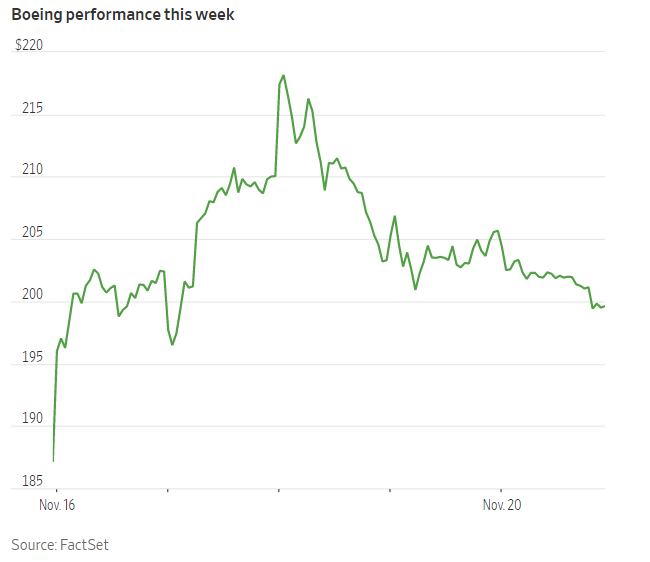

**TESLA (TSLA)**

- Tesla investors were electric after learning that the Silicon Valley car company would be joining the S&P 500. The electric-auto maker will be added to the index on Dec. 21, S&P Dow Jones Indices said late Monday. The addition will likely send Tesla’s already highflying shares to new heights, analysts say, thanks to the roughly USD 11 trillion in mutual funds and other investments that track the S&P 500. Tesla’s stock has more than quintupled this year, and the company is set to become the most valuable firm to ever join the index. Tesla shares rose 8.2% Tuesday.

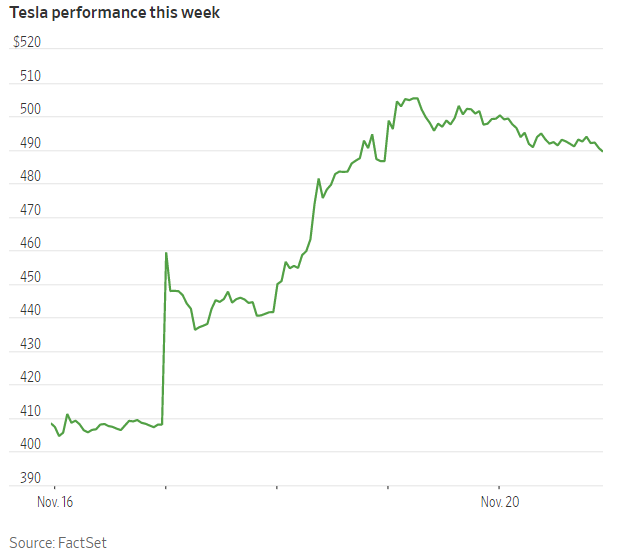

[Back to Table of Contents](#content)

<a id ="fi"></a>
## FIXED INCOME

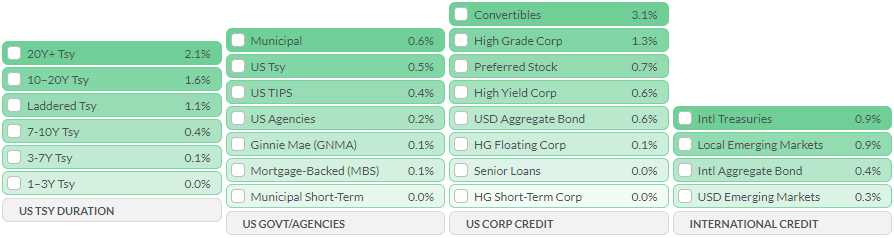

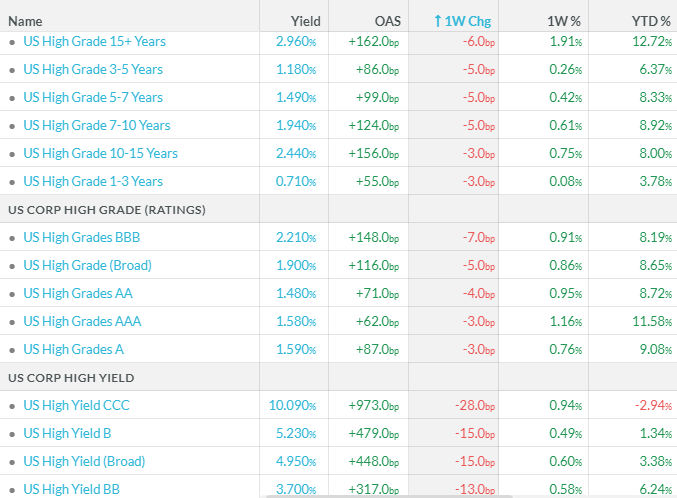

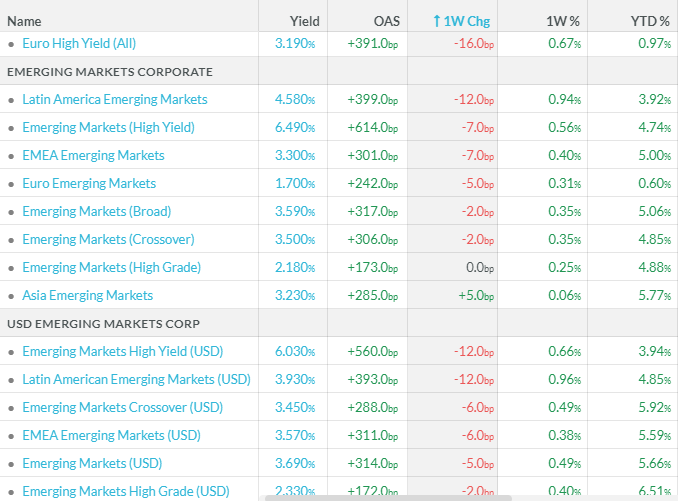

**HIGHLIGHTS**


- The week under review saw US Treasuries relatively well-bid on flight-to-safety mode amid concerns over restriction in economic activities and rise in COVID-19 infections. Overall benchmark yields fell between 2-9bps across the curve with the longer-ends benefitting the most. The curve bull-flattened as the 2Y benchmark; reflective of interest rate predictions edged 2bps lower at 0.16% whilst the much-watched 10Y (which traded within a tighter 0.82%-0.91% range); rallied 5bps at 0.83%. The 20Y bond auction tailed market’s expectations; yielding 1.422% on a mere BTC ratio of 2.27x (previous auction: 2.43x). 



- Separately, [China’s holdings of UST’s in September fell for a 4th straight month](https://wolfstreet.com/2020/11/19/who-bought-the-monstrous-4-2-trillion-of-incredibly-spiking-u-s-national-debt-added-over-the-past-12-months-everyone-but-china/) by USD 6.3b to its lowest level of USD 1.06 trillion since 2017. Japan too saw its holdings slip by USD 2.2b to USD 1.28 trillion. Separately, the US Treasury has decided [not to extend several emergency lending facilities](https://www.ft.com/content/e4b3a063-db44-4e6c-b998-74a29d70b136) set up by the Fed from the onset of the COVID-19 pandemic; prompting views that synergy between the two is lacking. Expect bonds to continue to benefit from safe-haven bids next week.


- One potential valuation opportunity within the emerging market complex is EMFX, which looks very cheap relative to the performance of other sectors since March. Equities, developed market credit and hard currency emerging market debt are all back in positive territory. Emerging market local currency bonds are down 0.77% on a total return basis, but the carry and price return on the bonds has been strong at 6.83%: the FX component, down 7.16%, has entirely driven the overall negative return. Selectivity is crucial given the differentiation in the index, but EMFX could present an opportunity, especially given the yield enhancement on offer relative to developed markets.

 
**EM currencies have substantially lagged the risk recovery**

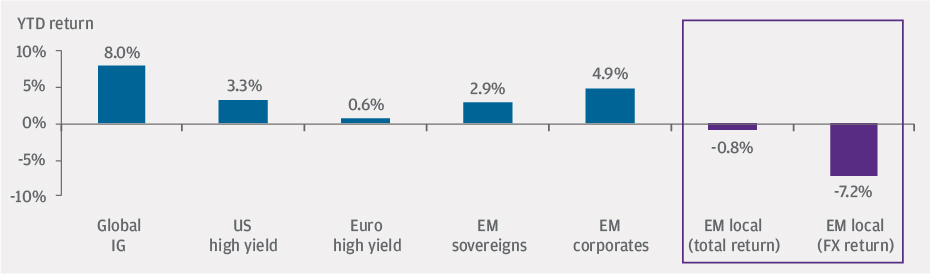

*Source: Bloomberg; data as of 18 November 2020. IG=investment grade.


- Almost USD 750 million has flowed into EM local currency funds so far in November. Recently, through investor surveys, a significant shift upwards in EMFX positioning across both emerging market debt and equity is observed, suggesting robust demand for the asset class more broadly. However, it’s important to watch for signs that EMFX isn’t becoming overbought, but nevertheless, key supportive technical factors persist. The global grab for yield has not gone away, with a huge amount of assets still sitting in money market funds (currently standing at USD 4.3 trillion, compared to USD 3.6 trillion at the start of 2020). In addition, there could be crossover investors—such as those managing unconstrained and multi-asset strategies—with more room to add to their EM allocations.

**TRAVEL BONDS SURGE**

> Airline and airport bonds are soaring in Europe’s credit market as progress in developing coronavirus vaccines spurs
optimism that international flights are set to recover. Travel-related securities dominate the best-performing euro
and sterling high-grade bonds since Pfizer Inc. announced a vaccine breakthrough earlier this month. Commercial
real estate notes have also rallied after being among virus-hit sectors to largely miss out on this year’s central bank fueled credit rally.

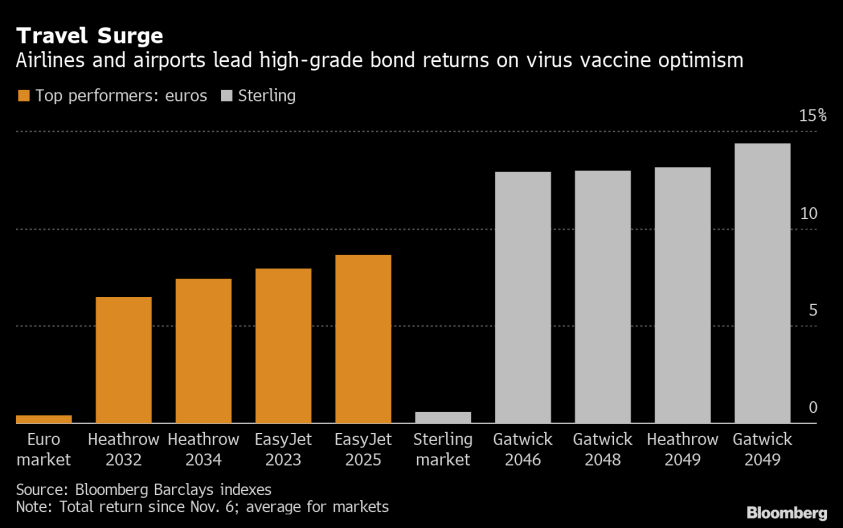


**CENTRAL BANKS AND RATES ACTION**

- The **South African Reserve Bank left its benchmark repo rate unchanged** at a record low of 3.5% during its November meeting, as widely expected. The decision was not unanimous and follows 300 bps rate cuts so far this year to support an economy already in recession before the pandemic shock. Policymakers said that the risks to the growth outlook are assessed to be balanced while overall risks to the inflation outlook appear to be to the downside in the near term and balanced over the medium term. The Reserve Bank also said that further easing was not likely in the near term but hinted two rate increases in the Q3 and Q4 of 2021. The Committee now expects that the economy will shrink by 8% in 2020, compared to September's estimate of a 8.2% contraction, before rebounding by 3.5% (previously 3.9%) in 2021 and 2.4% in 2022 (previously 2.6%). Estimates also point to 3.2% inflation in 2020 (vs prior 3.3%), 3.9% in 2021 (vs prior 4%) and 4.4% in 2022 (unrevised).


- The **Central Bank of Turkey raised its benchmark one-week repo rate by 475 bps to 15%** during its November meeting, saying the tightness of monetary policy will be decisively sustained until a permanent fall in inflation is achieved. Policymakers also said that the central funding will be provided through the one-week repo rate, which will be the main policy tool and the only indicator for the monetary stance. On a more positive note, the central bank noted that the recovery in Turkey's economic activity continued, despite uncertainties on the short-run outlook due to partial restrictions introduced to curb the increasing number of COVID-19 cases.


- **Brazil’s central bank signaled it will step in to support the real through foreign-exchange swaps if there are strong outflows by the end of the year**. Central bank officials reinforced views that inflation shocks are transitory and do not threaten plans to hold the interest rate at a record low. Fitch Ratings affirmed Brazil’s sovereign rating at BB- and maintained a negative outlook. President Jair Bolsonaro emerged weaker from Nov. 15 municipal elections that were widely seen as a referendum on the first half of his four-year mandate. The nation’s main exchange decided to allow trading on all assets on holidays in Sao Paulo.


- The **Philippine central bank** said it reduced its purchases of government bonds as the market stabilized following disruptions earlier in the year due to the pandemic. Philippine Finance Secretary Carlos Dominguez said he doesn’t see a need for outsized government borrowings. Philippines central bank Governor Benjamin Diokno said there’s a limit to what monetary policy can do to stimulate the economy amid the pandemic, pitching for a “whole-of government approach” a day after cutting key rate to a record low.


- The **central bank of Indonesia cut its benchmark interest rate by 25bps to a fresh record low of 3.75%** on November 19th 2020, compared to market expectations of no changes. Policymakers cut borrowing costs for the 5th time this year by a total of 125bps, aiming to support the economy after the coronavirus-hit. The deposit facility and lending facility rates were also lowered by 25bps to 3 percent and 4.5 percent, respectively. The central bank reinforced its commitment to provide liquidity and making sure rupiah levels reflect the fundamentals of the economy.

[Back to Table of Contents](#content)

<a id ="cur"></a>
## Currencies (FX)

In [12]:
ccy = pd.read_excel('World_Indices_List.xlsx', sheet_name='Currencies', header=0)
ccy_data = yf.download(list(ccy['Ticker']), start='2020-01-01', progress=False)
ccy_data = ccy_data['Close'].ffill()

In [13]:
def ccy_perf():
    oned_lcl = pd.concat([(ccy_data.iloc[-1,:]/ccy_data.iloc[-6,:]-1),
                            (ccy_data.iloc[-1,:]/ccy_data.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Ticker'
    oned_lcl = ccy.merge(oned_lcl, on='Ticker')
    oned_lcl= oned_lcl.set_index('Ticker')
    return oned_lcl

ccy = ccy_perf()

In [14]:
def ccy_hmap(sortby):   
    hmap = ccy.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Chg WTD (%)': "{:.3%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(ccy.drop(['Name'], axis=1).columns))
    return hmap
    
interact(ccy_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

In [15]:
def perf_ccy(timeframe):
    weekly_usd = ccy
    if timeframe=='Weekly':
        weekly_usd1 = ccy.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).sort_values(by='Chg WTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Name'], color_continuous_scale='rdylgn')

    elif timeframe=='YTD':
        weekly_usd1 = ccy.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).sort_values(by='Chg YTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Name'])

    fig.update_layout(title = 'World Currencies ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Indices',
                       yaxis_title='Return (%)', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Ticker: %{x} <br>Name: %{text} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_ccy,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS:**



- **USD:** The dollar remained volatile but continued its steady decline over the course of the week, trading within a range of 92.21-93.01 before ending at the lower end of the range at 92.4 as at yesterday’s close, down 0.38% WoW. The greenback weakened against all G10 currencies. While there continues to be noises amid President Trump’s attempted move to challenge the election results, vaccine optimism appear to have taken center stage, spurring risk rally and further dampening USD bids. Hardly any catalysts will be offered from the US data calendar, with PMIs on Monday and a bunch of releases of Wednesday (durable goods orders, second 3Q GDP read, PCE and personal spending) all unlikely to have major implications for markets. The minutes of the quite uneventful 5 November FOMC meeting will also be released on Wednesday, with any possible surprise coming from hints at a QE expansion in December.


- **EUR**: The re-emergence of frictions around the rule-of-law conditionality on the EU budget and Recovery Fund have held back EUR gains this week, but recent comments suggest [Hungary and Poland](https://in.reuters.com/article/us-eu-budget-hungary/hungary-sees-eu-recovery-plan-deal-poland-demands-new-compromise-idINKBN2800O1) may be opening up to a compromise. This should remain an important background story for the EUR and other European currencies (CEE FX, scandies) next week. Wider implications for the EUR should come from the EU-UK trade negotiations. Data-wise, Monday’s PMI will be in focus. While we saw only a small drop in the last month for most indicators, markets expects a significant slump (below 40) in the composite gauge, driven by a drop in services due to fresh containment measures. Manufacturing could also inch lower, but could remain above the 50 mark and possibly sweeten the pill for markets. Grim PMIs could cause the EUR to start the week on the back foot, although the impact should be short-lived considering investors have largely factored in the EZ growth de-rating and improving vaccine prospects are keeping investors upbeat on a sustained recovery



- **JPY**: USD/JPY declined steadily this week, down a whopping 1.22% WOW to 103.86 as at Friday close, after having traded between two big figures of 103.65 - 105.16 this week. It is a very quiet week data-wise in Japan and an even more quiet end of the week in global markets due to the long Thanksgiving week-end. We could see a marginally flatter US yield-curve next week, which may put a floor on the inversely-correlated JPY. Otherwise, any upside for JPY will likely rely on potential negative developments in Europe with respect to the EU-UK Brexit deal or a setback in EU Recovery Fund negotiations. Further rising infections world-wide may still offer some support to JPY in the crosses but with the prospects of a vaccine accelerating, risk-havens look unlikely to enjoy a fully-fledge rally at this stage.



- **AUD**: AUD is up on the week (+0.4%) but underperformed its closest peer NZD (which staged an impressive rally, up +1%). A set of labour data came in stronger than expected on Thursday and gave reasons to believe that RBA easing may have peaked. The RBA minutes from November suggested that the Bank considered holding off on the rate cut, but also signalled an ongoing discussion around extending the yield curve control to the 5Y. For now, what is clear about the RBA policy (and was made even clearer by Governor Lowe’s remarks this week) is that (a) negative rates are a remote option and (b) AUD strength is not a concern at the current levels. All this suggests the downside risks for AUD stemming from the RBA policy stance are relatively contained. Looking at other factors, any developments in the highly tense diplomatic and trade relationships with China remain central for AUD, while the Aussie data calendar is very quiet in the week ahead. 



- **NZD:** The NZD staged an impressive +1.8% rally this week against the dollar. The kiwi dollar appears to be a market favourite at the moment to jump on the broad USD weakness. Contributing to NZD momentum is the extensive downscaling of negative rates expectations in New Zealand. What we know however is that the RBNZ is one of the least relaxed central banks in the developed world when it comes to domestic currency appreciation. With NZD close to the 0.70 mark, the Bank may consider revamping its ultra-dovish language (i.e. suggesting negative rates) following the recent hawkish shift.  It is also worth mentioning NZD is facing some position-squaring-related downside risk considering that it has an abnormally large net-long positioning compared to other pro-cyclicals.



- **CNY**: The yuan climbed to the strongest level in more than two years. China’s market regulator expanded its investigation into bond sales for a state-backed coal miner that unexpectedly defaulted on payments last week, dragging in a number of banks, rating and accounting firms. Meanwhile, China priced its first euro-denominated bond sale in about a year, after taking advantage of ultra-low borrowing costs to help pare its reliance on dollar debt. [China gave one of its most detailed explanations yet for souring ties with Australia](https://www.thestar.com.my/aseanplus/aseanplus-news/2020/11/18/china-gives-detailed-explanation-on-bruised-ties-with-australia), calling on the nation to stop trying to impose its will on others.


- **MXN**: The Mexican peso touched a near two-week high of USD 20.0818, bringing its WTD gain to +1.83%, amid a rise in oil prices and prospects of an effective coronavirus vaccine. At the same time, the country won approval from the International Monetary Fund to maintain its flexible credit line at USD 63.4 billion amid the pandemic, bucking the reductions taken in recent years, according to three people familiar with the talks. On November 12th, Mexico’s central bank held its benchmark interest rate at 4.25%, surprising markets that expected a 25 bps rate cut. Policymakers said that the pause to easing cycle provides the necessary room to confirm that the trajectory of inflation converges to the target.


- **ZAR**: The South Africa rand was flat at 15.4 against the greenback on Friday, following small gains overnight after the South African Reserve Bank kept interest rates unchanged. WTD, the Rand rose +1.37% along with other EMs. Investors now focus on the expected credit rating reviews by Moody’s and S&P later in the day. There are concerns that the two agencies might further downgrade South Africa junk credit rating, due to comments on South Africa’s finance Minister Tito Mboweni’s budget speech last month. In particular, Moody’s had warned South Africa’s budget lacked detail on how and when the government will implement policies to boost economic growth, and so public debt would likely continue to increase for years.


- **BRL**: Brazil’s central bank signaled it will step in to support the real through foreign-exchange swaps if there are strong outflows by the end of the year Central bank officials reinforced views that inflation shocks are transitory and do not threaten plans to hold the interest rate at a record low Fitch Ratings affirmed Brazil’s sovereign rating at BB- and maintained a negative outlook President Jair Bolsonaro emerged weaker from Nov. 15 municipal elections that were widely seen as a referendum on the first half of his four-year mandate. The real was up +2.8% this week, but still down 24% YTD.

[Back to Table of Contents](#content)

<a id ="comd"></a>
## Commodities

In [16]:
comds= pd.read_excel('World_Indices_List.xlsx', sheet_name='Commodities', header=0)

In [18]:
tdy = str(date.today().day)+'/'+str(date.today().month)+'/'+str(date.today().year)

#def comd_data(commodity):
#    df = investpy.get_commodity_historical_data(commodity=commodity, from_date='01/01/2020', to_date=tdy)['Close']
#    df = pd.DataFrame(df)
#    df.columns = [commodity]
#    return df

#df = pd.DataFrame(index=pd.bdate_range(start='2020-01-01', end=date.today()))
#df.index.name='Date'

#for i in range(len(comds)):
#    df = df.join(comd_data(comds['Commodities'][i]), on='Date')

#df = df.ffill().dropna()
#df.to_excel('comd1.xlsx')

In [19]:
df = pd.read_excel('rawdata.xlsx', sheet_name='Commodities', header=0, index_col=0)

In [20]:
def comd_perf():
    oned_lcl = pd.concat([df.iloc[-1,:], (df.iloc[-1,:]/df.iloc[-6,:]-1),
                            (df.iloc[-1,:]/df.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Price (EOD)', 'Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Commodities'
    return oned_lcl

comd = comd_perf()
comd.drop('Lumber', axis=0, inplace=True)

In [21]:
def comd_hmap(sortby):   
    hmap = comd.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}", 'Chg WTD (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)'], axis=1).columns))
    return hmap
    
interact(comd_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

In [22]:
def perf_comd(timeframe):
    weekly_usd = comd
    if timeframe=='Weekly':
        weekly_usd1 = comd.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).dropna().sort_values(by='Chg WTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values,text=weekly_usd1.index, color_continuous_scale='rdylgn')

    elif timeframe=='YTD':
        weekly_usd1 = comd.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).sort_values(by='Chg YTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1.index, color_continuous_scale='rdylgn')

    fig.update_layout(title = 'Commodities ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Return (%)',
                       yaxis_title='Commodities', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Commodity: %{x} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_comd,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS**


> Global markets remain torn between the negative impact of surging coronavirus cases around the world and the prospect for vaccines being rolled out in the new year. This also partly helps to explain why the commodity sector has ‘only’ risen by 2% since the  November 9 announcement. While energy and industrial metals, which would benefit from increased mobility and economic recovery, have risen the major gains have to some extent continued to be driven by the agricultural sector.


> Zooming in on this past week we find cocoa, coffee and platinum on top while natural gas, silver and gold scrape the bottom with politics, weather and vaccine news the key drivers behind these developments. New York-traded cocoa surged 12% after [Hershey, one of America’s top chocolate makers, took to the unusual step to source large amounts from the futures exchange instead of the physical market](https://www.bloomberg.com/news/articles/2020-11-19/hershey-is-behind-the-big-cocoa-trade-that-upended-n-y-markets?srnd=markets-vp) after West African nations added a hefty premium for their beans.



- **Brent crude** futures gained about 5% this week to settle at USD 45 a barrel on Friday, enjoying a third consecutive week of gains, boosted by prospects for effective COVID-19 vaccines and hopes that OPEC+ would delay a planned rise in oil output. Oversupply concerns also mounted as Libya raised crude production to pre-blockade levels of 1.25 million bpd. While energy futures may struggle to break higher until fundamentals show an actual improvement, the forward-looking stock market does not have the same problem. Since the first vaccine news from Pfizer/BioNTech hit the wires on November 9, **major oil companies have rallied strongly**. The **MSCI World Energy index has since that day risen by 19% while the XLE ETF tracking major U.S. energy producers had risen by almost one-quarter**. 


- Even after these strong gains, both of these are still down by 35% and 40% respectively in 2020. During the same time, Brent and WTI crude oil futures have added around half the gains seen at company level. While a vaccine will eventually drive a normalization in demand, we should not forget that crude oil and commodities in general do not, like equities, have the luxury of being able to roll forward expectations as supply and demand need to balance every day.

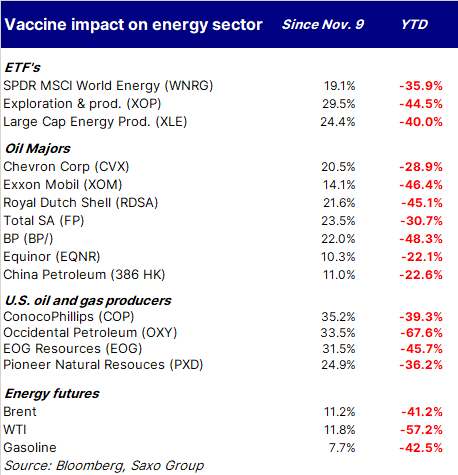

-  **Platinum jumped above USD 900/oz to record its best week in four months**. What made the move stand out was the fact that **gold and silver both went in the opposite direction** in response to vaccine news-related profit taking. The rally gathered momentum after the [World Platinum Investment Council in its Platinum Quarterly raised the 2020 supply deficit to 1.2 million ounces with a deficit of 0.2 million seen in 2021](https://platinuminvestment.com/files/786933/WPIC_PR_PQ_Q3_2020_20201118.pdf). Reasons being the stellar rebound in automotive demand and sustained strong investment demand for precious metals, including platinum. 


- Meanwhile, **Gold continued to lose momentum** in response to recent vaccine announcements and their potential effectiveness in combatting a not-yet-under-control coronavirus outbreak. This development has driven a [small exodus out of exchange-traded funds](https://www.business-standard.com/article/markets/gold-takes-a-knock-amid-exodus-from-etfs-progress-on-covid-vaccines-120112000005_1.html) with total holdings down 1.75 million ounces to 109.3 million, a 2 ½-month low.



- **Natural gas**: Finally, not a week without a looser and this time the always-volatile natural gas contract scraped the bottom. Unseasonably warm weather has reduced heating demand, thereby lifting stock levels while delaying the beginning of the winter withdrawal season. Last week, some 31 billion cubic feet went into storage versus a five-year average drop of 24 billion cubic feet.

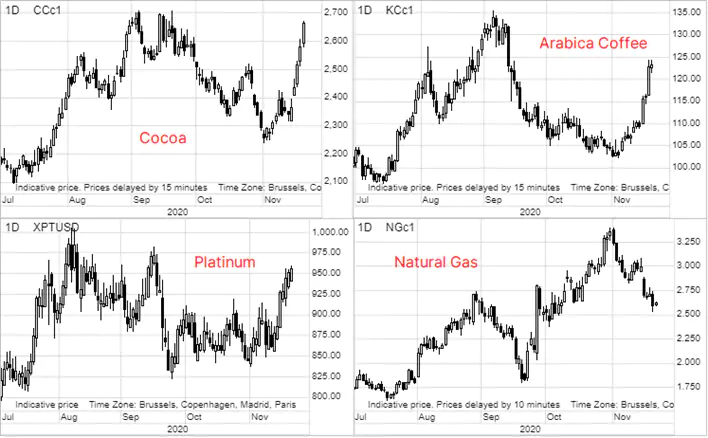

- In Softs, **Cocoa surged higher after Hersey, according to Bloomberg, stepped in and bought a large amount of cocoa futures for delivery during December**. As a result, the December price over the March, the next futures contract, jumped from zero to a record 250 dollars. In order to understand why a major chocolate buyer suddenly bids up the price for supplies by more 250 dollars we have to look at the alternative.


- Earlier this year Ivory Coast and Ghana, in order to support local farmers, decided to add a hefty USD 400/ton premium on supplies from the 2020-21 season which began in October. However, faced with reduced demand due to lockdowns buyers have been balking at paying the premium at a time of weakening demand. As a result, the futures price has rocketed while the West African nations still have a lot of cocoa from the current crop to sell.

[Back to Table of Contents](#content)

<a id ="charts"></a>
### CHARTS OF THE WEEK

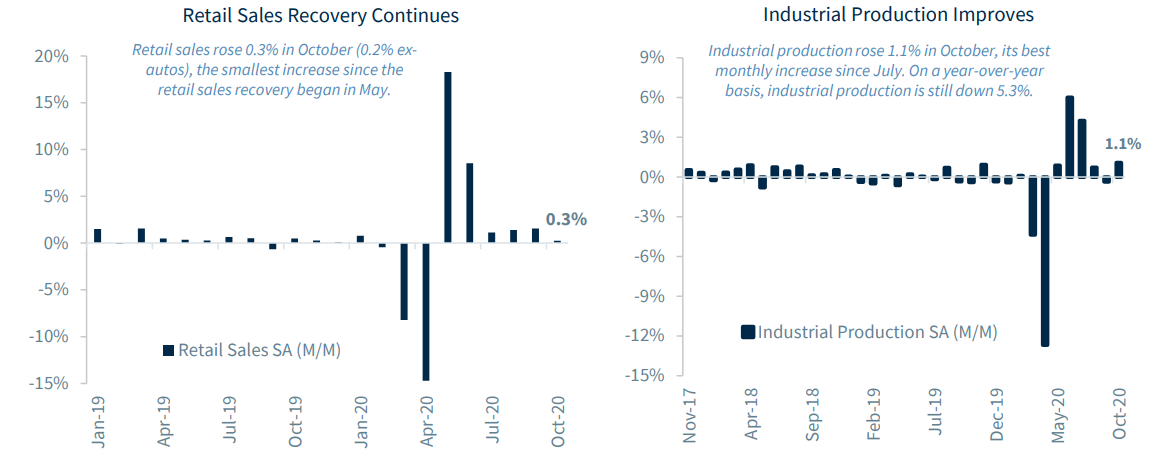

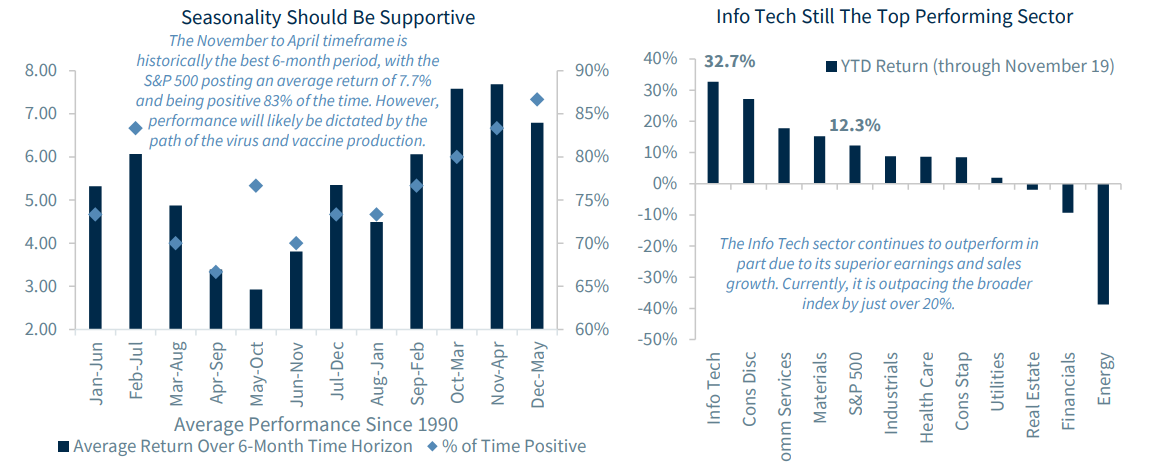

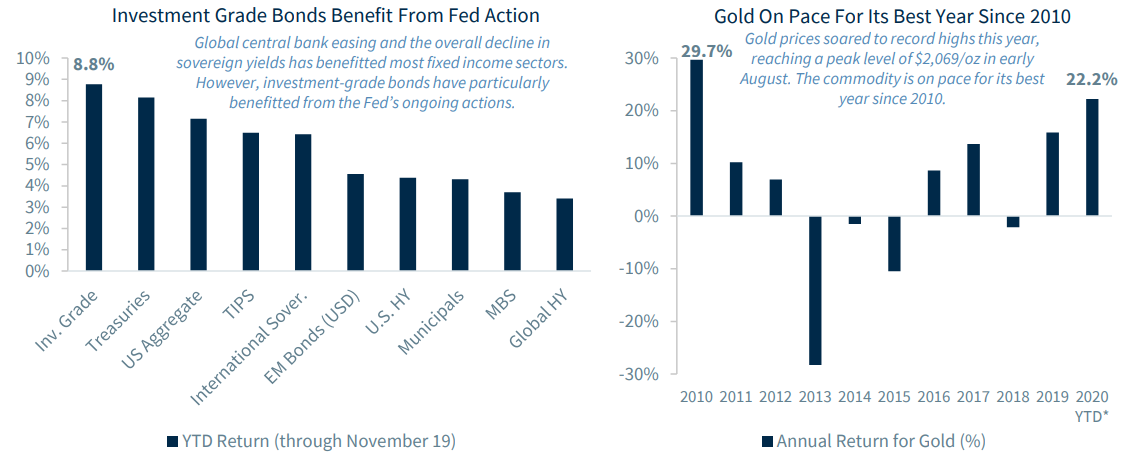

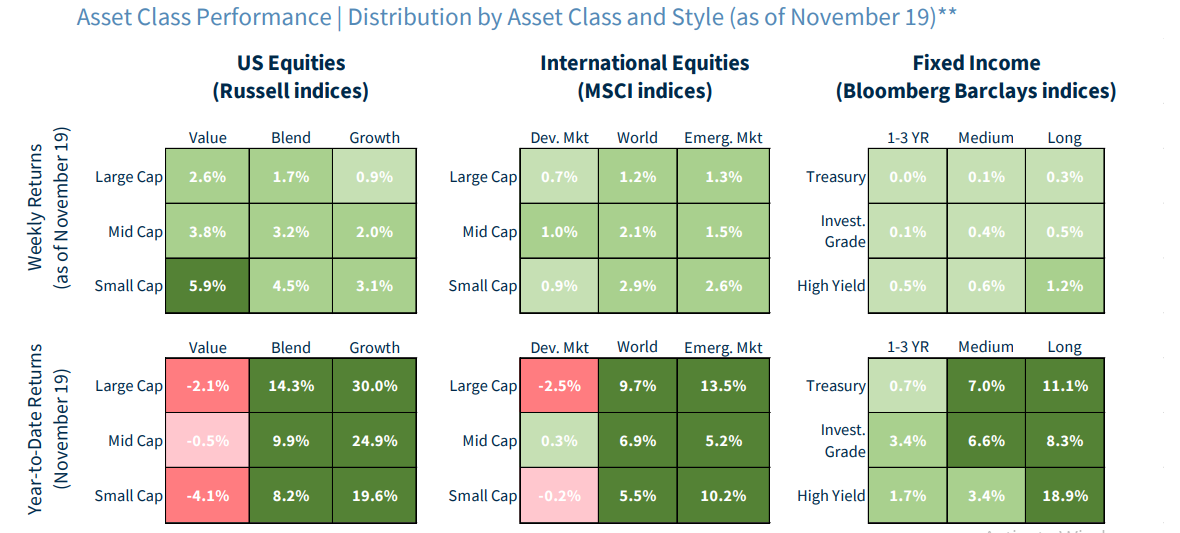

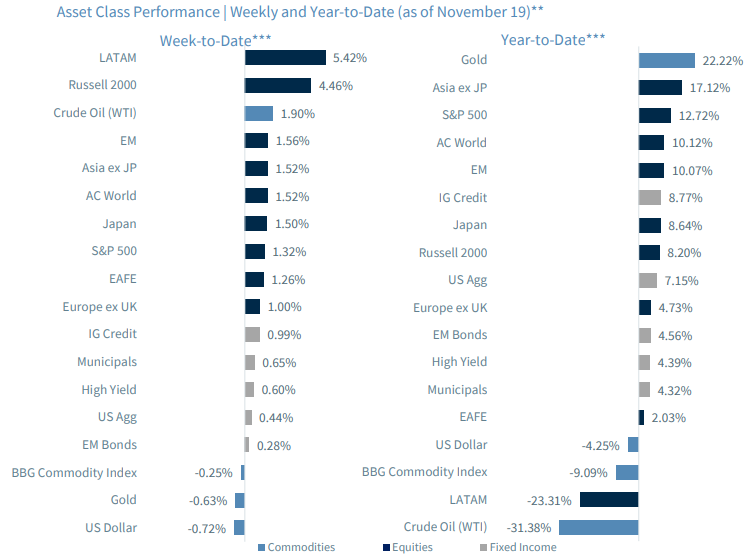

[Back to Table of Contents](#content)

<a id ="eco"></a>

## Key Economic Events Next Week 

In [23]:
HTML("""
<!-- TradingView Widget BEGIN -->
<div class="tradingview-widget-container">
  <div class="tradingview-widget-container__widget"></div>
  <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/markets/currencies/economic-calendar/" rel="noopener" target="_blank"><span class="blue-text">Economic Calendar</span></a> by TradingView</div>
  <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-events.js" async>
  {
  "colorTheme": "light",
  "isTransparent": false,
  "width": "700",
  "height": "600",
  "locale": "en",
  "importanceFilter": "0,1"
}
  </script>
</div>
<!-- TradingView Widget END --> """)

[Back to Table of Contents](#content)